# SVM Classifier for Fashion-MNIST

In this notebook, I will implement a Support Vector Machine (SVM) classifier to classify the Fashion-MNIST dataset.

In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn 
import torch.nn.functional as F 

from tensorflow.keras.datasets import fashion_mnist

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

import utils

from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [13]:
X_train[0].shape

(28, 28)

In [14]:
# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
def train_and_test_svm(kernel='rbf', C=1.0, degree=3, gamma='scale'):
    # Initialize the SVM model
    svm_model = SVC(kernel=kernel, C=C, degree=degree, gamma=gamma)

    # Train the model
    svm_model.fit(X_train, y_train)

    # Make predictions
    y_pred = svm_model.predict(X_test)

    # Evaluate the model
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Plot some predictions
    for i in range(5):
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
        plt.show()

[[856   0   9  29   3   1  90   0  12   0]
 [  4 961   3  25   3   0   4   0   0   0]
 [ 13   1 815  12  92   0  64   0   3   0]
 [ 28   3  12 893  31   0  29   0   4   0]
 [  0   0  84  30 821   0  61   0   4   0]
 [  0   0   0   1   0 958   0  26   2  13]
 [142   1  92  31  67   0 647   0  20   0]
 [  0   0   0   0   0  20   0 959   0  21]
 [  3   0   2   5   4   4   3   4 974   1]
 [  0   0   0   0   0   8   0  37   3 952]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.81      0.81      1000
           3       0.87      0.89      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.97      0.96      0.96      1000
           6       0.72      0.65      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.95      0.97      0.96      1000
           9       0.96     

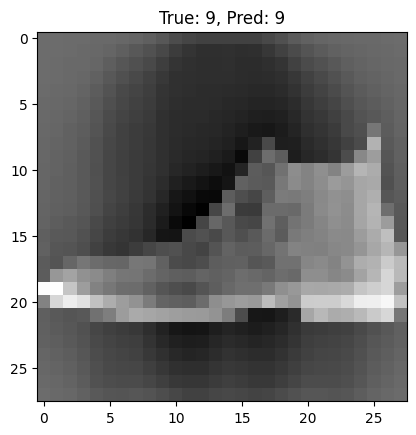

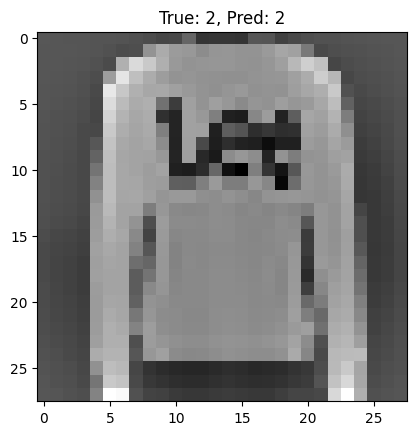

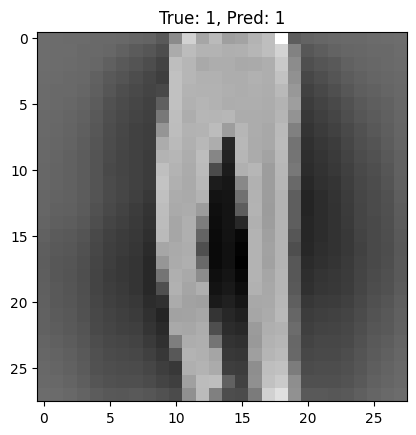

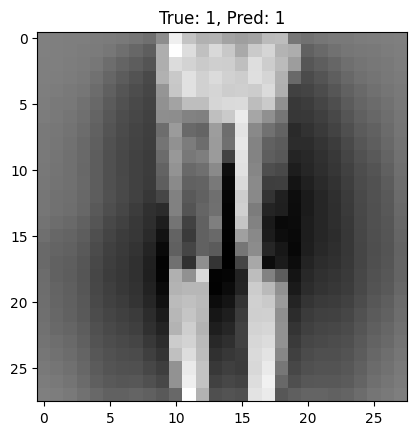

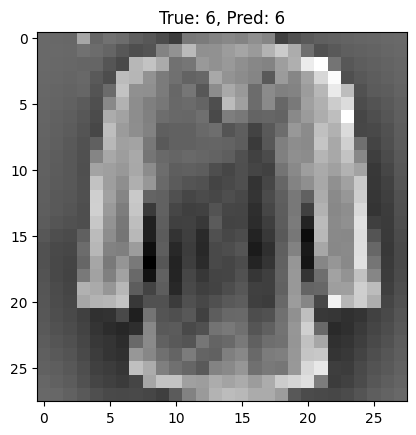

In [21]:
train_and_test_svm(kernel='rbf', C=1.0, degree=3, gamma='scale')

[[856   0   9  29   3   1  90   0  12   0]
 [  4 961   3  25   3   0   4   0   0   0]
 [ 13   1 815  12  92   0  64   0   3   0]
 [ 28   3  12 893  31   0  29   0   4   0]
 [  0   0  84  30 821   0  61   0   4   0]
 [  0   0   0   1   0 958   0  26   2  13]
 [142   1  92  31  67   0 647   0  20   0]
 [  0   0   0   0   0  20   0 959   0  21]
 [  3   0   2   5   4   4   3   4 974   1]
 [  0   0   0   0   0   8   0  37   3 952]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.81      0.81      1000
           3       0.87      0.89      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.97      0.96      0.96      1000
           6       0.72      0.65      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.95      0.97      0.96      1000
           9       0.96     

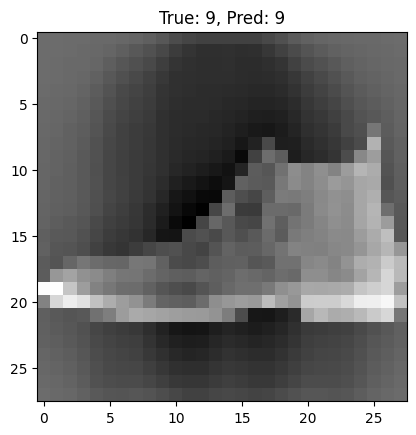

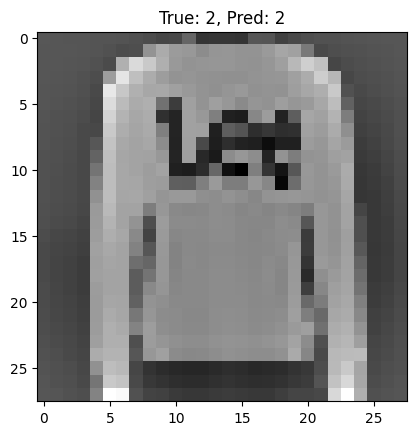

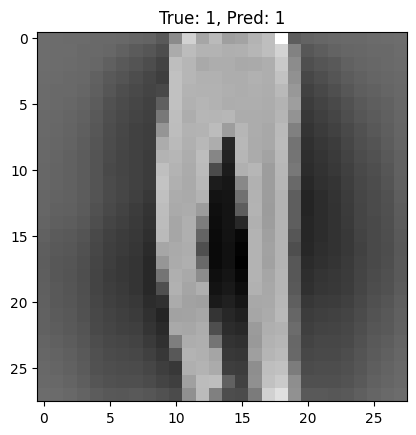

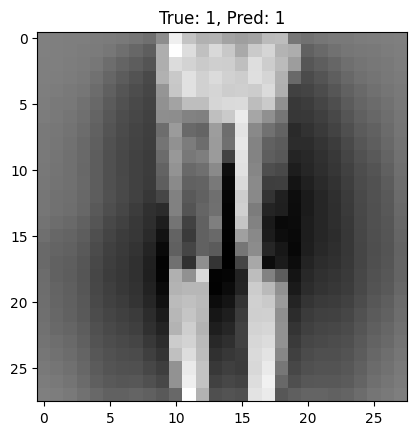

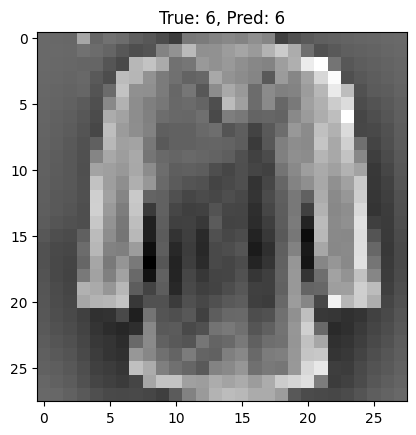

In [22]:
train_and_test_svm(kernel='rbf', C=1.0, degree=10, gamma='scale')